<a href="https://colab.research.google.com/github/Salma-Jamal/Machine-Learning-and-Statistical-Analysis/blob/main/Assignment03/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://cdn.discordapp.com/attachments/778630432878362676/911736391933759568/Assignment_3_data.zip

--2021-11-22 20:17:11--  https://cdn.discordapp.com/attachments/778630432878362676/911736391933759568/Assignment_3_data.zip
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.130.233, 162.159.134.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.130.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 287189 (280K) [application/zip]
Saving to: ‘Assignment_3_data.zip’

Assignment_3_data.z 100%[===================>] 280.46K  --.-KB/s    in 0.03s   

2021-11-22 20:17:12 (8.12 MB/s) - ‘Assignment_3_data.zip’ saved [287189/287189]



In [ ]:
!unzip /content/Assignment_3_data.zip

Archive:  /content/Assignment_3_data.zip
  inflating: Data1.txt               
  inflating: Data3-1.txt             
  inflating: Data3-2.txt             
  inflating: Data3-3.txt             


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, invgauss
import scipy.stats as stats
import pylab as pl
pl.style.use('ggplot')

In [ ]:
def visualize(data,mean,std,name):
  fit = stats.norm.pdf(data, mean, std)  
  pl.hist(x1,color = "skyblue")
  pl.title('Histogram of %s'%(name))
  pl.show()                   

In [ ]:
def hypothesis_test(x1, x2, alpha,name,name2):
    '''
    This function does a hypothesis test over the mean by considering x1 as the population and x2 as the mean. Alpha is the
    significance level
    Output: lower bound of the critical region, higher bound of the critical region, p-value.
    '''
    popu_size  = x1.size
    samp_size  = x2.size

    popu_mean  = np.mean(x1)
    samp_mean  = np.mean(x2)
    
    popu_std   = np.std(x1)
    samp_std = np.std(x2)
    
    z0 = (samp_mean - popu_mean) / ( popu_std / math.sqrt(samp_size) )
    pvalue = 2*(1-norm.cdf(z0))

    z02 = alpha/2
    z02 = norm.ppf(z02)

    lower_critical_limit =  popu_mean + z02 * ( popu_std / math.sqrt(samp_size))
    upper_critical_limit =  popu_mean - z02 * ( popu_std / math.sqrt(samp_size) )

    print("\nBetween %s and %s:\n"%(name,name2))
    print("Lower1 = ", lower_critical_limit)
    print("Upper1 = ",upper_critical_limit)
    print("p-value1 = ",pvalue,"\n")
    if pvalue <= (1-alpha):
      print("Reject\n")
    else:
      print("Accept\n")

    visualize(x1,popu_mean,popu_std,name)
    print('\n')
    visualize(x2,samp_mean,samp_std,name2)
    
    return lower_critical_limit, upper_critical_limit, pvalue

Problem 3

Between Data3-1 and Data3-2:

Lower1 =  -0.09451612771737695
Upper1 =  0.029252845815376946
p-value1 =  0.8614735881829605 

Reject



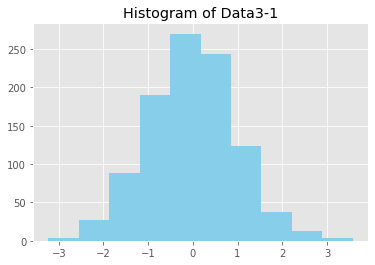

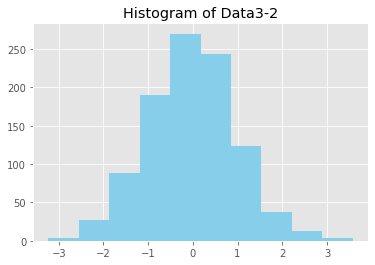



####################################################################################################

Between Data3-1 and Data3-3:

Lower1 =  -0.09451612771737695
Upper1 =  0.029252845815376946
p-value1 =  0.00010244978312501374 

Reject



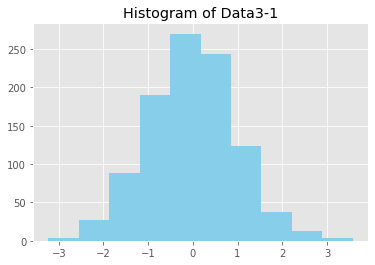

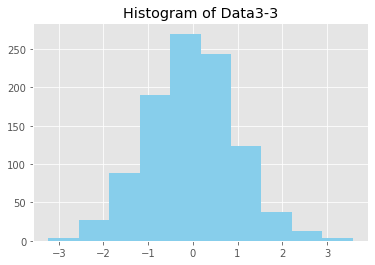

In [ ]:
print("Problem 3")

x1 = pd.read_csv('Data3-1.txt', sep=",", header=None)
x1 = np.array(x1).squeeze(0)
x2 = pd.read_csv('Data3-2.txt', sep=",", header=None)
x2 = np.array(x2).squeeze(0)
x3 = pd.read_csv('Data3-3.txt', sep=",", header=None)
x3 = np.array(x3).squeeze(0)

lower1, upper1, pvalue1 = hypothesis_test(x1, x2, 0.05,"Data3-1","Data3-2")
print("\n")
print("#"*100)
lower2, upper2, pvalue2 = hypothesis_test(x1, x3, 0.05,"Data3-1","Data3-3")